In [22]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learnig Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,RobustScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
# Data Ingestion

df = pd.read_csv(r'C:\BankChurn_PredictionModel\data\raw\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


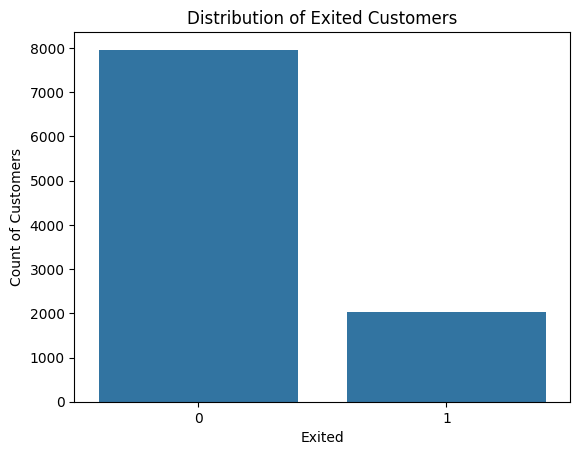

In [54]:
# Exploratory Data Analysis
# Distribution of Exited
sns.countplot(x='Exited',data=df)
plt.xlabel('Exited')
plt.ylabel('Count of Customers')
plt.title('Distribution of Exited Customers')
plt.show()


In [42]:
isactivemember_exited = df[df['IsActiveMember'] == 1]['Exited'].value_counts()
isnotactivemember_exited = df[df['IsActiveMember'] == 0]['Exited'].value_counts()

Exited
0    4416
1     735
Name: count, dtype: int64


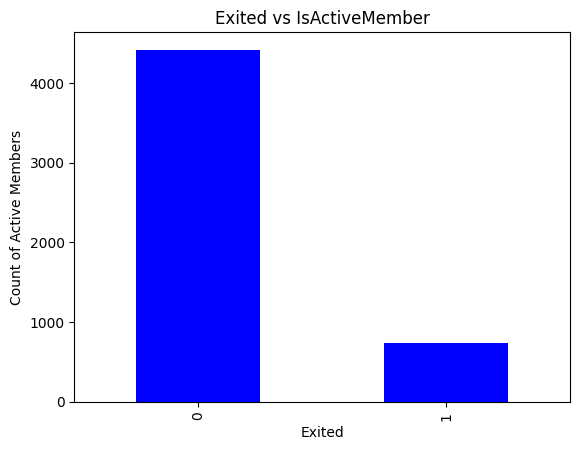

In [ ]:
# Exited vs IsActiveMember
print(isactivemember_exited)
isactivemember_exited.plot(kind='bar',color='blue',label='IsActiveMember')
plt.xlabel('Exited')
plt.ylabel('Count of Active Members')
plt.title('Exited vs IsActiveMember')
plt.show()

Exited
0    3547
1    1302
Name: count, dtype: int64


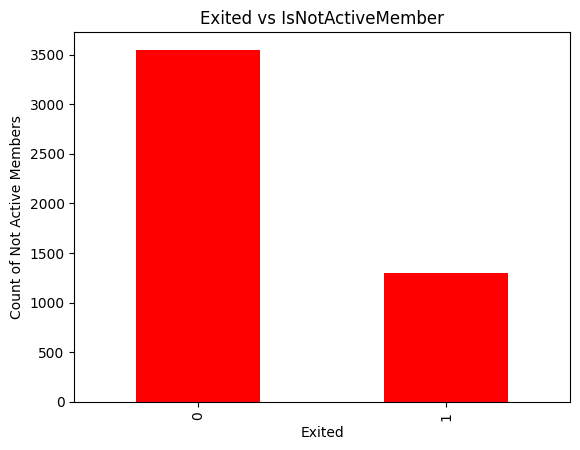

In [49]:
# Exited vs IsNotActiveMember
print(isnotactivemember_exited)
isnotactivemember_exited.plot(kind='bar',color='red',label='IsNotActiveMember')
plt.xlabel('Exited')
plt.ylabel('Count of Not Active Members')
plt.title('Exited vs IsNotActiveMember')
plt.show()

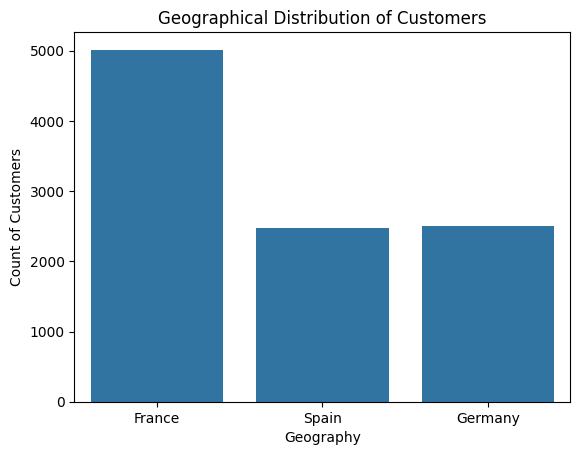

In [57]:
# Geographical Distribution of Customers
# This data csv file
count_of_customers_by_geography = df['Geography'].value_counts()
count_of_customers_by_geography.to_csv('count_of_customers_by_geography.csv', index=True)
sns.countplot(x='Geography',data=df)
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
plt.title('Geographical Distribution of Customers')
plt.show()

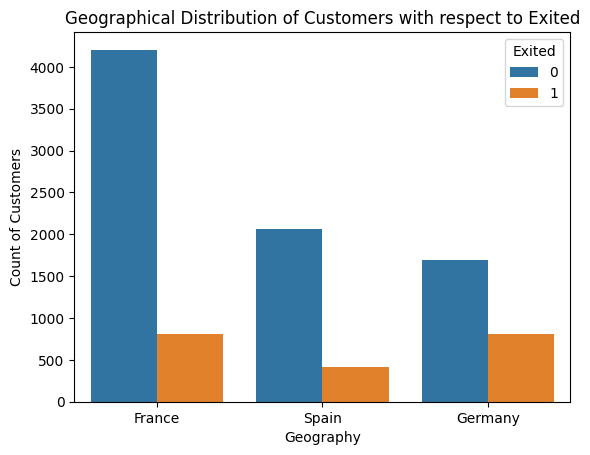

In [53]:
# geographical distribution of customers with respect to exited
sns.countplot(x='Geography',hue='Exited',data=df)
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
plt.title('Geographical Distribution of Customers with respect to Exited')
plt.show()

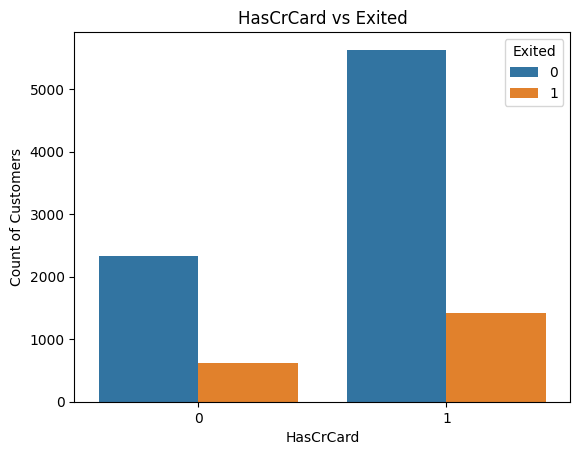

In [58]:
# HasCrCard,IsActiveMember,Exited
sns.countplot(x='HasCrCard',hue='Exited',data=df)
plt.xlabel('HasCrCard')
plt.ylabel('Count of Customers')
plt.title('HasCrCard vs Exited')
plt.show()

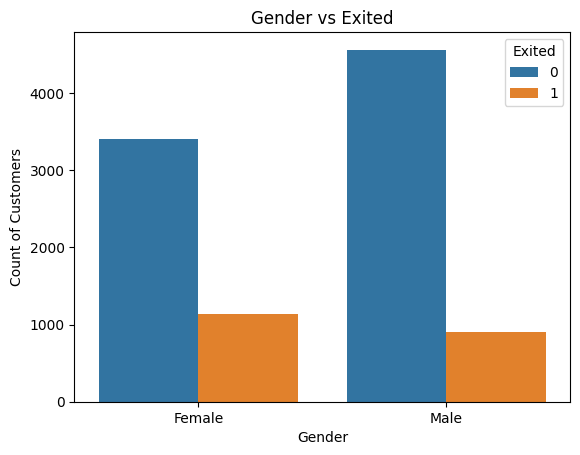

In [68]:
# Gender vs Exited
# csv file
a = df.groupby(['Gender','Exited']).value_counts().unstack()
a.to_csv('gender_exited.csv', index=True)
sns.countplot(x='Gender',hue='Exited',data=df)
plt.ylabel('Count of Customers')
plt.title('Gender vs Exited')
plt.show()  

In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:

df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [29]:
# Split the data into features and target variable
X = df.drop('Exited',axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [30]:
# Segregate the numerical and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

from collections import OrderedDict

numerical_stats = []

for i in numerical_cols:
    num_stats = OrderedDict({
        "Feature":i,
        "Maximum":df[i].max(),
        "Minimum":df[i].min(),
        "Mean":df[i].mean(),
        "Q1":df[i].quantile(0.25),
        "Q2":df[i].quantile(0.50),
        "Q3":df[i].quantile(0.75),
        "IQR":df[i].quantile(0.75) - df[i].quantile(0.25),\
        "Standard Deviation":df[i].std(),
        "Variance":df[i].var(),
        "Skewness":df[i].skew(),
        "Kurtosis":df[i].kurtosis(),
    })
    numerical_stats.append(num_stats)
    numerical_summary_df = pd.DataFrame(numerical_stats)

categorical_stats = []

for i in categorical_cols:
    cat_stats = OrderedDict({
        "Feature": i,
        "Count": df[i].count(),
        "Mode": df[i].mode(),
        "Unique Values": df[i].nunique(),
        "Frequency of Mode": df[i].value_counts()
    })

    categorical_stats.append(cat_stats)
    categorical_summary_df = pd.DataFrame(categorical_stats)


pd.set_option('display.max_columns', None)
print(numerical_summary_df)

           Feature    Maximum  Minimum           Mean        Q1          Q2  \
0      CreditScore     850.00   350.00     650.528800    584.00     652.000   
1              Age      92.00    18.00      38.921800     32.00      37.000   
2           Tenure      10.00     0.00       5.012800      3.00       5.000   
3          Balance  250898.09     0.00   76485.889288      0.00   97198.540   
4    NumOfProducts       4.00     1.00       1.530200      1.00       1.000   
5        HasCrCard       1.00     0.00       0.705500      0.00       1.000   
6   IsActiveMember       1.00     0.00       0.515100      0.00       1.000   
7  EstimatedSalary  199992.48    11.58  100090.239881  51002.11  100193.915   

            Q3          IQR  Standard Deviation      Variance  Skewness  \
0     718.0000     134.0000           96.653299  9.341860e+03 -0.071607   
1      44.0000      12.0000           10.487806  1.099941e+02  1.011320   
2       7.0000       4.0000            2.892174  8.364673e+00  

In [31]:
# Display categorical summary
pd.set_option('display.max_columns', None)
print(categorical_summary_df)


     Feature  Count                                        Mode  \
0  Geography  10000  0    France
Name: Geography, dtype: object   
1     Gender  10000       0    Male
Name: Gender, dtype: object   

   Unique Values                                  Frequency of Mode  
0              3  Geography
France     5014
Germany    2509
Spai...  
1              2  Gender
Male      5457
Female    4543
Name: cou...  


In [32]:
# Using Label Encoding for categorical variables
le = LabelEncoder()

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
# Feature Scaling using RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

# Using SMOTE for handling class imbalance
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


In [33]:
y_train.value_counts()

Exited
0    5590
1    5590
Name: count, dtype: int64

In [34]:
# Model Building
models = {
    "Logistic Regression": LogisticRegression(),    
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SCV": SVC()
}

In [35]:
# Model Evaluation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
[[1724  649]
 [ 210  417]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2373
           1       0.39      0.67      0.49       627

    accuracy                           0.71      3000
   macro avg       0.64      0.70      0.65      3000
weighted avg       0.79      0.71      0.74      3000

--------------------------------------------------
Model: Decision Tree
[[2011  362]
 [ 291  336]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2373
           1       0.48      0.54      0.51       627

    accuracy                           0.78      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.79      0.78      0.79      3000

--------------------------------------------------
Model: Random Forest
[[2175  198]
 [ 269  358]]
              precision    recall  f1-score   support

           0       0.89      0.92      